# Regression Neural Network

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing prepared dataset
import pickle
input = open('data_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [10]:
#!pip install tensorflow
#!pip install keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(6, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(4, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [18]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.8510 - accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.7432 - accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.0000e+00
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.0000e+00
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.0000e+00
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss:

22/22 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.0000e+00
Epoch 80/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.0000e+00
Epoch 81/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.0000e+00
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1538 - accuracy: 0.0000e+00
Epoch 83/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1539 - accuracy: 0.0000e+00
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.0000e+00
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 0.0000e+00
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.0000e+00
Epoch 87/100
22/22 [==============================] - 0s 1ms/step - loss: 0.1510 - accuracy: 0.0000e+00
Epoch 88/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1

In [19]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

In [20]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [22]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat).round(3)

0.04

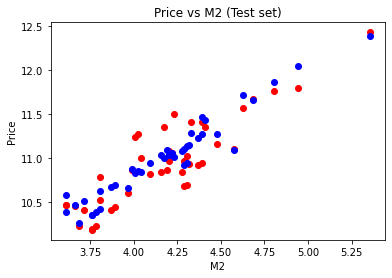

In [24]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], y_hat, 'bo')
plt.title('Price vs M2 (Test set)')
plt.xlabel('M2')
plt.ylabel('Price')
plt.show()